# Data Analysis & Visualization of Diabetes patients of Pima Indian heritage


## About the dataset

In this section, we will go about how to approach data acquisition in various ways and obtain necessary insights from a dataset.

In our case, the **Diabetes Dataset** is an online source and it is in CSV (comma separated value) format. Let's use this dataset as an example to practice data reading.

**Context:** This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**.


## Objective

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years of age of Pima Indian heritage.

**Content:** The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We have 768 rows and 9 columns. The first 8 columns represent the features and the last column represent the target/label.


In [33]:
# Import pandas library

import pandas as pd

In [34]:
from pyodide.http import pyfetch
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

await download(filename, "diabetes.csv")
df = pd.read_csv("diabetes.csv")``

We use the **dataframe.head(n)** method to check the top n rows of the dataframe, where n is an integer. 

Contrary to **dataframe.head(n)**, **dataframe.tail(n)** will show you the bottom n rows of the dataframe.


In [35]:
# show the first 5 rows using dataframe.head() method

print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.shape

(768, 9)

# Statistical Overview of dataset


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.


In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Identify and handle missing values


We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

**.isnull()**

**.notnull()**

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [39]:
missing_data = df.isnull()
missing_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.


<h4>Count missing values in each column</h4>


In [40]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Pregnancies
False    768
Name: Pregnancies, dtype: int64

Glucose
False    768
Name: Glucose, dtype: int64

BloodPressure
False    768
Name: BloodPressure, dtype: int64

SkinThickness
False    768
Name: SkinThickness, dtype: int64

Insulin
False    768
Name: Insulin, dtype: int64

BMI
False    768
Name: BMI, dtype: int64

DiabetesPedigreeFunction
False    768
Name: DiabetesPedigreeFunction, dtype: int64

Age
False    768
Name: Age, dtype: int64

Outcome
False    768
Name: Outcome, dtype: int64



As you can see above, there is no missing values in the dataset.


<h3 id="correct_data_format">Correct data format</h3>



In [41]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

As we can see above, All columns have the correct data type.


# Visualization


**Seaborn** and **Matplotlib** are two of Python's most powerful visualization libraries.


In [42]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns

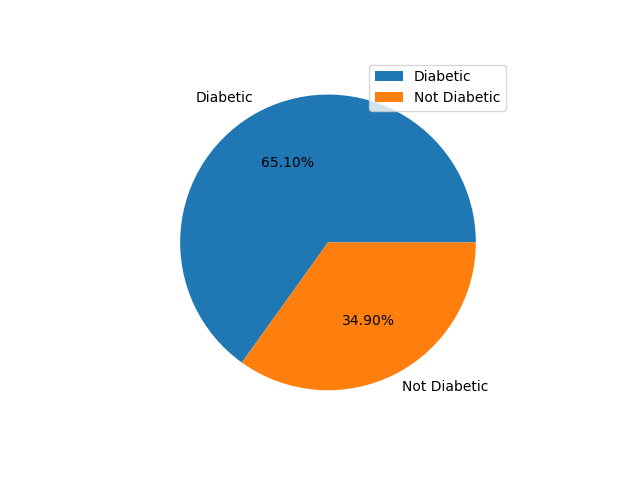

In [43]:
labels= 'Diabetic','Not Diabetic'
plt.pie(df['Outcome'].value_counts(),labels=labels,autopct='%0.02f%%')
plt.legend()
plt.show()

As you can see above, 65.10% females are Diabetic and 34.90% are Not Diabetic.


## Developer

<a href="https://www.linkedin.com/in/yasir-savanur/" target="_blank">Yasir Savanur</a>


